## Tipos de variables y escalas de medición

In [1]:
import pandas as pd
import os

cache_path = "data/iris.csv" 

if os.path.isfile(cache_path):
  iris = pd.read_csv(cache_path)
else:
  print("No se encuentra el archivo")

In [2]:
print(iris.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


## Tablas de frecuencia

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Tablas de frecuencia para variables cualitativas

### Graficar una tabla de frecuencias

In [17]:
from plotnine import *

freq_by_species = (iris 
  .groupby("Species")
  .agg(frequency=("Species", "count"))
  .reset_index())

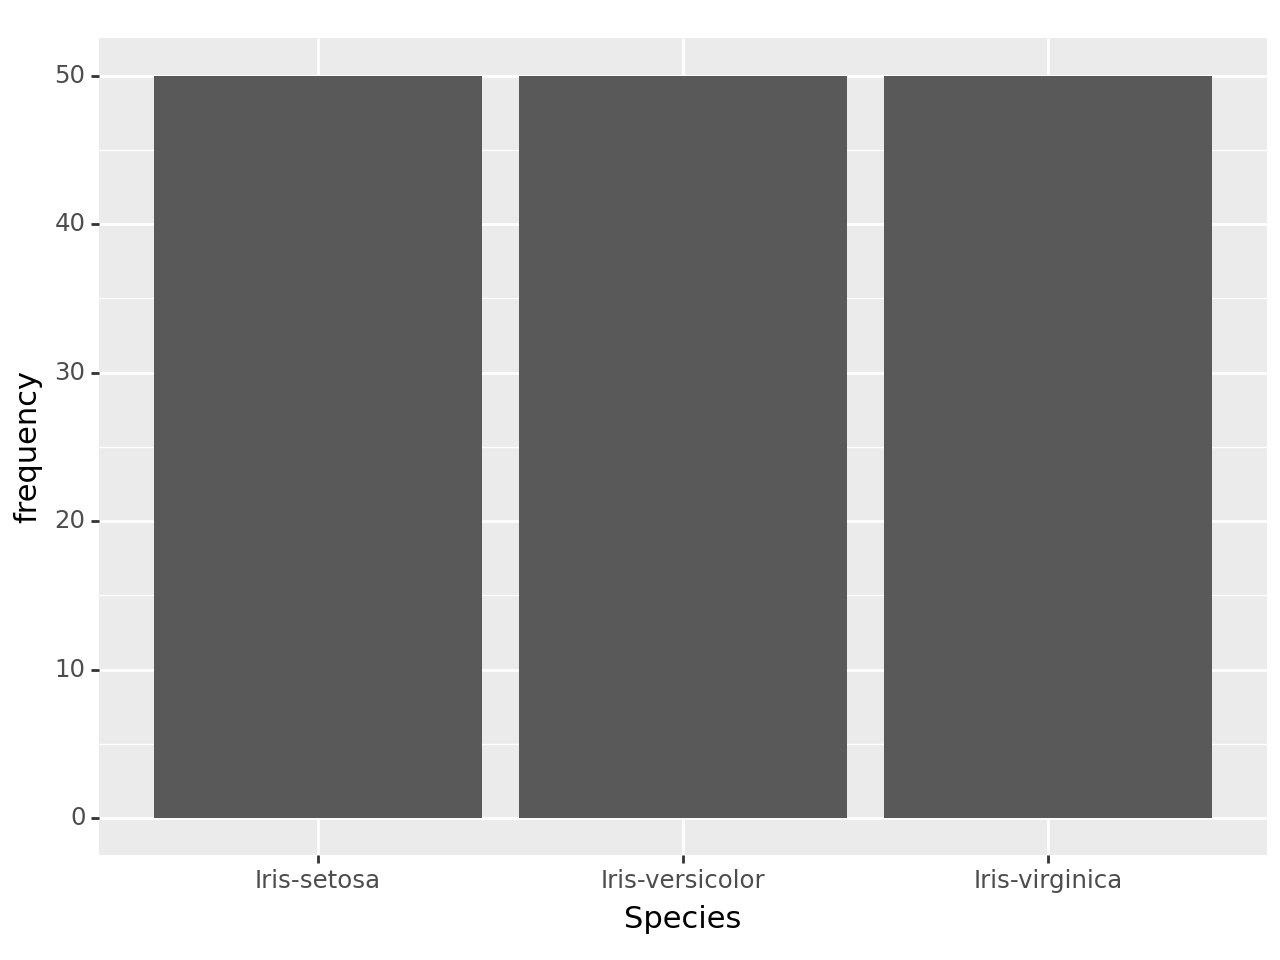

<Figure Size: (640 x 480)>

In [18]:
(ggplot(freq_by_species, aes(x = "Species", y = "frequency")) +
  geom_bar(stat = 'identity'))

## Media aritmética

### Como calcular la media

In [20]:
# Para calcular la media en python con pandas utilizamos el método mean de la columna:
iris["SepalWidthCm"].mean()

# el método .mean de pandas automáticamente elimina los valores faltantes. {% /notice %}

3.0540000000000003

In [21]:
iris.agg({"SepalWidthCm": "mean"})

SepalWidthCm    3.054
dtype: float64

In [22]:
(iris
  .groupby(lambda _: "")
  .agg(
    sepal_width_mean=("SepalWidthCm", "mean"),
    sepal_width_sum=("SepalWidthCm", "sum"),
    sepal_length_mean=("SepalLengthCm", "mean")))

,sepal_width_mean,sepal_width_sum,sepal_length_mean
,3.054,458.1,5.843333


### Propiedades de la media
Dada una muestra de tamaño n , x1,x2,...,xn , se puede demostrar que la media aritmética, X¯ cumple con las siguientes propiedades:

**Conceptos**:
* Operadores lineales: Función que conserva suma y multiplicación en operaciones matemáticas. L(x + y) = L(x) + L(y) & L(cx) = c * L(x)


#### 1. La media es un **Operador lineal**.

In [23]:
iris["petal_length_plus_one"] = iris["PetalLengthCm"] + 1
iris["petal_length_double"] = iris["PetalLengthCm"] * 2

iris["PetalLengthCm"].mean()

3.758666666666666

In [24]:
iris["petal_length_plus_one"].mean()

4.758666666666667

In [25]:
iris["petal_length_double"].mean()

7.517333333333332

#### 2. La media de una constante es la constante

In [26]:
iris["constant"] = 10
iris["constant"].mean()

10.0

 3. Si substituímos todos los valores de una variable por su media, el total se mantiene igual.

In [27]:
iris["sepal_width_mean"] = iris["SepalWidthCm"].mean()

iris["sepal_width_mean"].sum()

458.1000000000001

In [29]:
iris["SepalWidthCm"].sum()

458.1

### Media truncada
La media es un estadístico no robusto. Esto quiere decir que sensible a los valores atípicos. Intuitivamente, un valor atípico es un valor que no se parece al resto de los valores en un conjunto de datos por ser muy alto o muy bajo.
Una manera de solucionar esto es usar una media truncada, en la que eliminamos cierta fracción de los datos más altos y más bajos.

In [31]:
from scipy.stats import trim_mean

trim_mean(iris["SepalWidthCm"], 0.2)

3.036666666666666

### Media ponderada
En situaciones con pesos o frecuencias, la media considera estas influencias.

In [32]:
df = pd.DataFrame([
  [1, 10],
  [2, 20],
  [3, 30],
  [4, 40]
  ], columns=["x", "f"])

(df["x"] * df["f"]).sum() / df["f"].sum()

3.0

## Varianza y desviación típica

### Promediar los desvíos

In [33]:
iris["sepal_length_deviations"] = iris["SepalLengthCm"] - iris["SepalLengthCm"].mean()

iris["sepal_length_deviations"].mean()

-3.315866100213801e-16

### Desviación media

In [16]:
import numpy as np

# Obtener los valores de la columna "SepalLengthCm" como un arreglo NumPy
sepal_lengths = iris["SepalLengthCm"].values

# Calcular la media de los valores de la columna "SepalLengthCm"
mean_sepal_length = np.mean(sepal_lengths)

# Calcular la desviación absoluta media utilizando NumPy
mad = np.mean(np.abs(sepal_lengths - mean_sepal_length))

print(mad)

# md = iris["SepalLengthCm"].mad()
# md

0.6875555555555557


### Varianza

#### 1. Calcular la cuasi-varianza. Esta función también omite los valores faltantes, como con la media.

In [18]:
iris["SepalLengthCm"].var()

0.6856935123042507

#### 2. Calcular la varianza

In [21]:
iris["SepalLengthCm"].var(ddof=0)

0.6811222222222223

### Propiedades de la varianza y la cuasi-varianza
se puede demostrar que la varianza, cumple con las siguientes propiedades:

#### 1.Si multiplicas una variable por una constante, su dispersión se multiplica por el cuadrado de esa constante. Si sumas una constante, la dispersión no cambia. 

In [23]:
iris["petal_length_plus_one"] = iris["SepalLengthCm"] + 1
iris["petal_length_double"] = iris["SepalLengthCm"] * 2

iris["SepalLengthCm"].var()

0.6856935123042507

In [24]:
iris["petal_length_plus_one"].var()

0.6856935123042506

In [25]:
iris["petal_length_double"].var()

2.7427740492170027

#### 2. La menor suma de desvíos al cuadrado que podemos obtener es cuando la calculamos con respecto de la media.

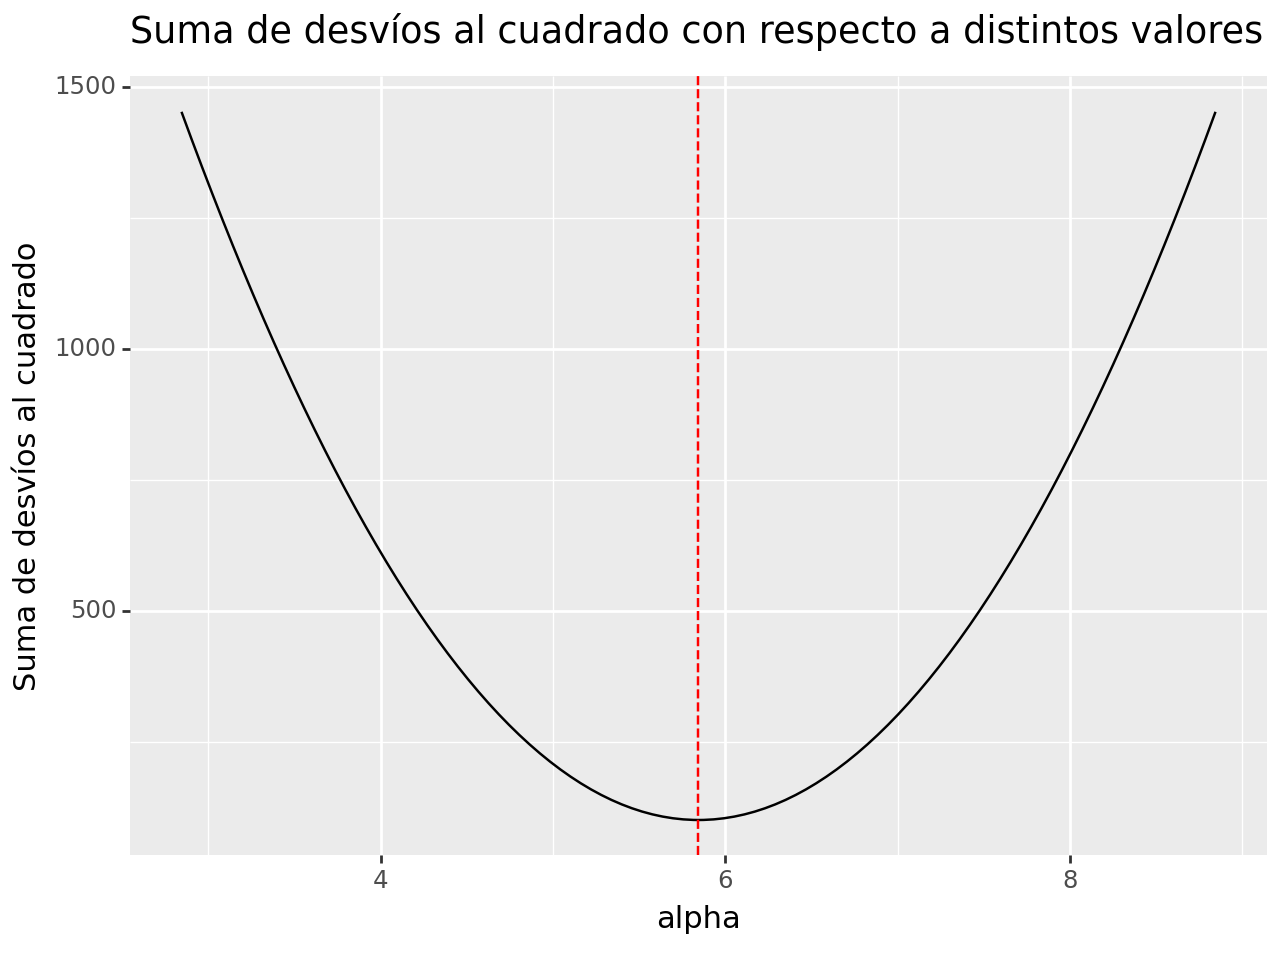

<Figure Size: (640 x 480)>

In [27]:
import numpy as np
from plotnine import *

mean_petal_length = iris["SepalLengthCm"].mean()
min_petal_length = mean_petal_length - 3
max_petal_length = mean_petal_length + 3

alpha_n_steps = 100
alpha_step = (max_petal_length - min_petal_length) / (alpha_n_steps + 1)
alpha_values = np.arange(min_petal_length, max_petal_length+alpha_step, alpha_step)
alpha_values = np.append(alpha_values, iris["SepalLengthCm"].mean())

def sum_of_squares(alpha, df, column):
  square_deviations = (df[column] - alpha).pow(2)
  df = pd.DataFrame({"ss": [square_deviations.sum()], "alpha": [alpha]})
  
  return df

ss = pd.concat([sum_of_squares(alpha, iris, "SepalLengthCm") for alpha in alpha_values])

(ggplot(ss, aes(x="alpha", y="ss")) +
  geom_line() +
  geom_vline(aes(xintercept=mean_petal_length), linetype="dashed", colour="red") +
  ggtitle("Suma de desvíos al cuadrado con respecto a distintos valores") +
  labs(y="Suma de desvíos al cuadrado")
)

#### 3. La varianza de una constante es 0

In [28]:
constant = pd.Series([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
constant.var()

0.0

### Desviación típica

* Desviación típica
![Desviación](./img/desviacion.png)

In [33]:
iris["PetalLengthCm"].std(ddof=0)

1.7585291834055212

* Cuasi-desviación típica
![Cuasi-Desviación](./img/cuasi-desviacion.png)

In [31]:
iris["PetalLengthCm"].std()

1.7644204199522626

## ¿Cómo se ve la dispersión?
Vamos a comparar la desviación típica de sepal_length para las distintas species:

In [34]:
(iris
 .groupby("Species")
 .agg(sepal_length_sd=("PetalLengthCm", "std")))

,sepal_length_sd
Species,
Iris-setosa,0.173511
Iris-versicolor,0.469911
Iris-virginica,0.551895


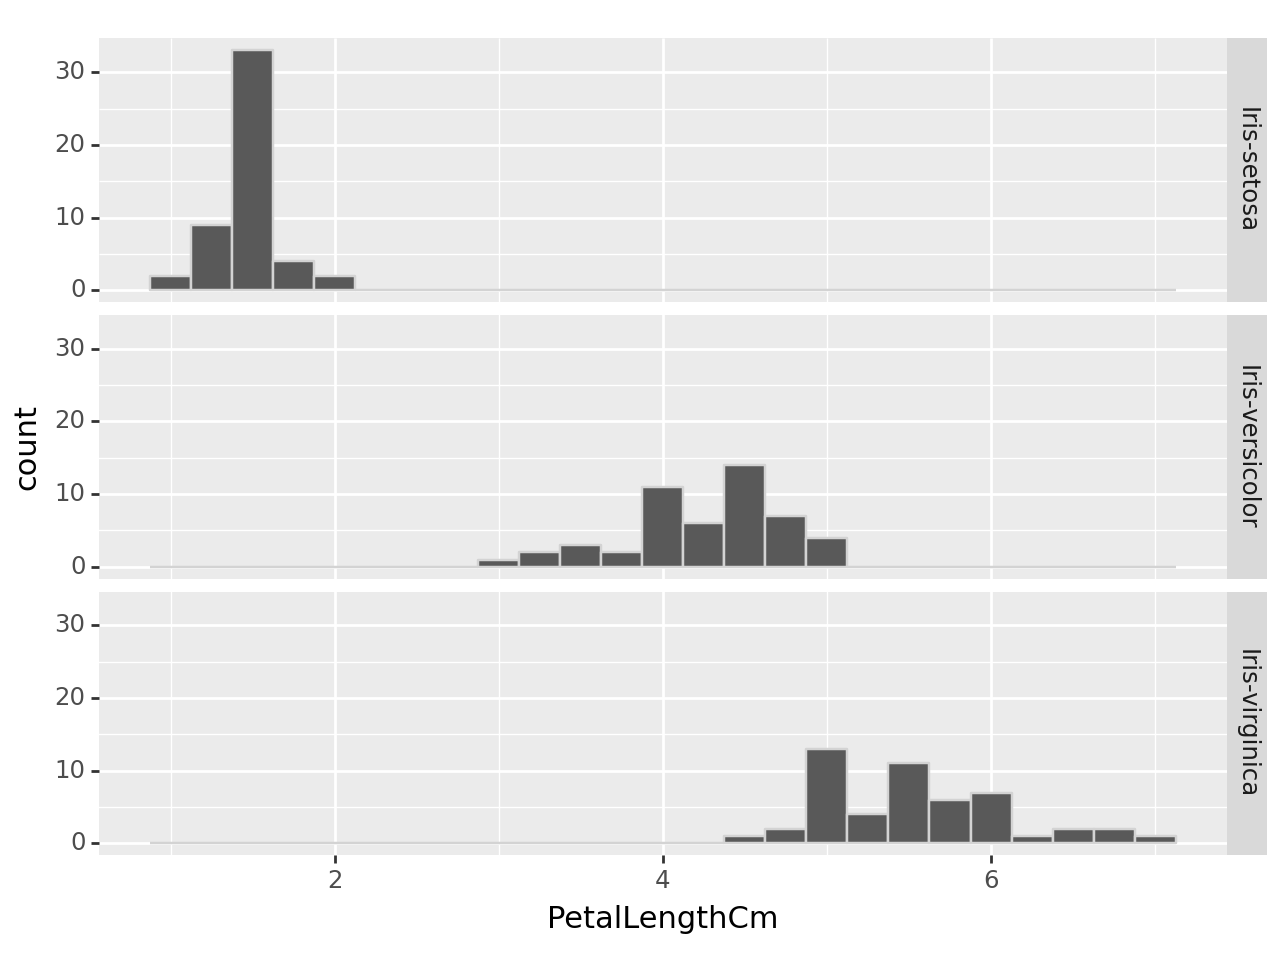

<Figure Size: (640 x 480)>

In [36]:
from plotnine import *

(ggplot(iris) +
  geom_histogram(aes(x="PetalLengthCm"), binwidth=0.25, colour='lightgrey') + 
  facet_grid("Species ~ ."))

## Estandarización

## Medidas de posición

## Asimetría y kurtosis

## Covarianza

## Correlación